1) Решить систему линейных алгебраических уравнений   методом Монте-Карло.  
2) Сравнить с решением данного уравнения, полученным в произвольном математическом пакете.  
3) Построить график зависимости точности решения от длины цепи маркова и числа смоделированных цепей маркова.

In [121]:
import numpy as np
import random
import matplotlib.pyplot as plt
from math import sqrt

from sklearn.metrics import mean_squared_error 
from numpy.linalg import norm

%matplotlib inline

In [56]:
A = np.array([[1, -0.5, 0.9],
             [0.1, 1.5, -0.1],
             [0.1, -0.8, 0.2]])
A

array([[ 1. , -0.5,  0.9],
       [ 0.1,  1.5, -0.1],
       [ 0.1, -0.8,  0.2]])

In [57]:
f = np.array([1, 3, -1])
f

array([ 1,  3, -1])

Equation solution using **numpy.linalg.solve**

In [58]:
python_solution = np.linalg.solve(A,f)
python_solution

array([-12.14285714,   3.92857143,  16.78571429])

In [59]:
a = np.eye(len(A)) - A
a

array([[ 0. ,  0.5, -0.9],
       [-0.1, -0.5,  0.1],
       [-0.1,  0.8,  0.8]])

In [60]:
#моделируем реализацию цепи Маркова длины N
def count_ksi(N, A, f, h, pi, p):
    #N - длина цепи Маркова
    #pi - вектор начальных вероятностей цепи Маркова
    #p - матрица переходных состояний(вероятностей) цепи Маркова
        
    #цепь Маркова
    i = []
    
    alpha = random.random()

    #index of state that will be implemented
    ind_state = 0
    sum_state = pi[0]
    while alpha >= sum_state:
        ind_state += 1
        sum_state += pi[ind_state]
    i.append(ind_state)
    
    #Веса состояний цепи Маркова
    Q = []

    #Вычисляем веса цепи Маркова
    if(pi[i[0]] > 0):
        Q.append(h[i[0]] / pi[i[0]])
    else: #pi[i[0]] = 0
        Q.append(0)
    
    ksi = Q[0] * f[i[0]]

    for k in range(1, N):
        alpha = random.random()
        
        #index of state that will be implemented
        ind_state = 0
        sum_state = pi[0]
        while alpha >= sum_state:
            ind_state += 1
            sum_state += pi[ind_state]
        i.append(ind_state)
        
        if(pi[i[k]] > 0):
            Q.append(Q[k-1] * a[i[k-1], i[k]] / p[i[k-1]][i[k]])
        else:
            Q.append(0)
 
        ksi += Q[k] * f[i[k]]
    
    return ksi

In [61]:
def linalg_monte_carlo(a, f, N, m):
    #N - длина цепи Маркова
    #m - количество реализаций цепи Маркова
    
    #размерность системы
    n = len(A)
    
    #решение системы
    x = np.zeros(n)
    
    h = np.identity(n)
    
    #вектор начальных вероятностей цепи Маркова
    pi = [1 / n] * n
    
    #матрица переходных состояний(вероятностей) цепи Маркова
    p = [[1 / n] * n for _ in range(n)]

    for j in range(n):
        x[j] = sum(count_ksi(N, a, f, h[:, j], pi, p) for _ in range(m)) / m
    
    return x

In [64]:
def mse(x, y):
    assert len(x) == len(y)
    return sum([(x[i] - y[i]) ** 2  for i in range(len(x))])

In [131]:
def plot(x, y, x_label, y_label):
    plt.plot(x, y)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [127]:
NN = [1, 200, 800, 1000]
M = [1, 200, 800, 1000, 1500, 2000]

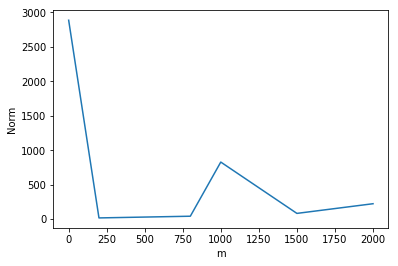

In [133]:
answers_N_fixed = [linalg_monte_carlo(a, f, NN[3], i) for i in M]

norm_N_fixed = []

for j in answers_N_fixed:
    norm = .0
    for i in range(3):
        norm += (python_solution[i] - j[i])**2
    norm = sqrt(norm)
    norm_N_fixed.append(norm)

plot(M, norm_N_fixed, "m", "Norm")

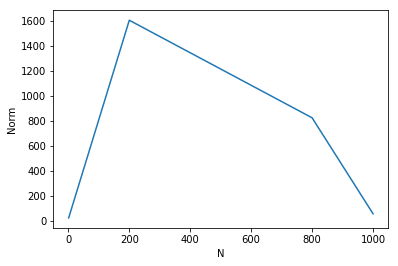

In [135]:
answers_m_fixed = [linalg_monte_carlo(a, f, i, M[3]) for i in NN]

norm_m_fixed = []

for j in answers_m_fixed:
    norm = .0
    for i in range(3):
        norm += (python_solution[i] - j[i])**2
    norm = sqrt(norm)
    norm_m_fixed.append(norm)

plot(NN, norm_m_fixed, "N", "Norm")